/tmp/ipykernel_615/1318292654.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["hydrological_year", "month", "NAO_index"])


Correlation between mean specific mass balance and NAO (January): -0.316
Correlation between mean specific mass balance and NAO (February): -0.440
Correlation between mean specific mass balance and NAO (March): -0.131
Correlation between mean specific mass balance and NAO (April): -0.136
Correlation between mean specific mass balance and NAO (May): -0.065
Correlation between mean specific mass balance and NAO (June): 0.144
Correlation between mean specific mass balance and NAO (July): 0.078
Correlation between mean specific mass balance and NAO (August): 0.013
Correlation between mean specific mass balance and NAO (September): 0.157
Correlation between mean specific mass balance and NAO (October): 0.180
Correlation between mean specific mass balance and NAO (November): -0.162
Correlation between mean specific mass balance and NAO (December): -0.242


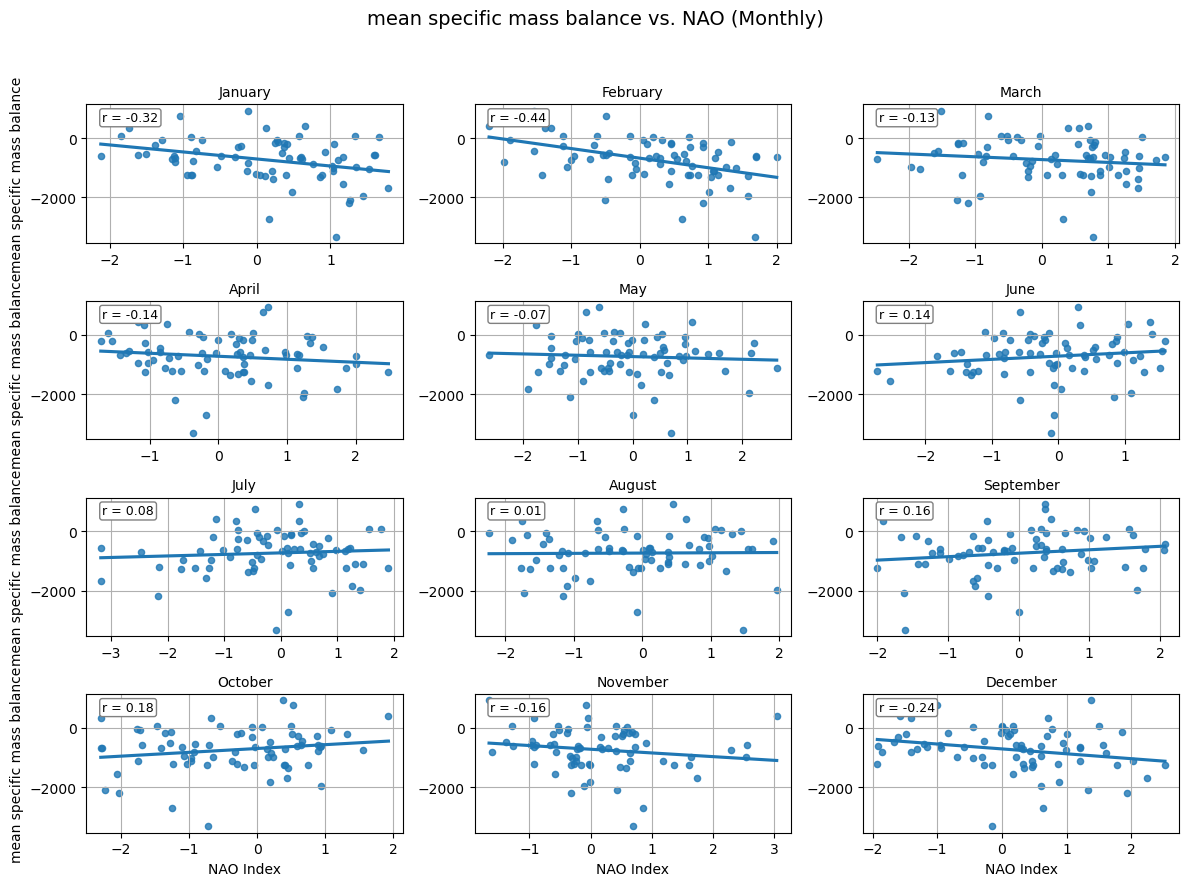

Correlation between climatic mass balance and NAO (January): -0.320
Correlation between climatic mass balance and NAO (February): -0.445
Correlation between climatic mass balance and NAO (March): -0.118
Correlation between climatic mass balance and NAO (April): -0.150
Correlation between climatic mass balance and NAO (May): -0.063
Correlation between climatic mass balance and NAO (June): 0.180
Correlation between climatic mass balance and NAO (July): 0.085
Correlation between climatic mass balance and NAO (August): 0.038
Correlation between climatic mass balance and NAO (September): 0.158
Correlation between climatic mass balance and NAO (October): 0.214
Correlation between climatic mass balance and NAO (November): -0.159
Correlation between climatic mass balance and NAO (December): -0.251


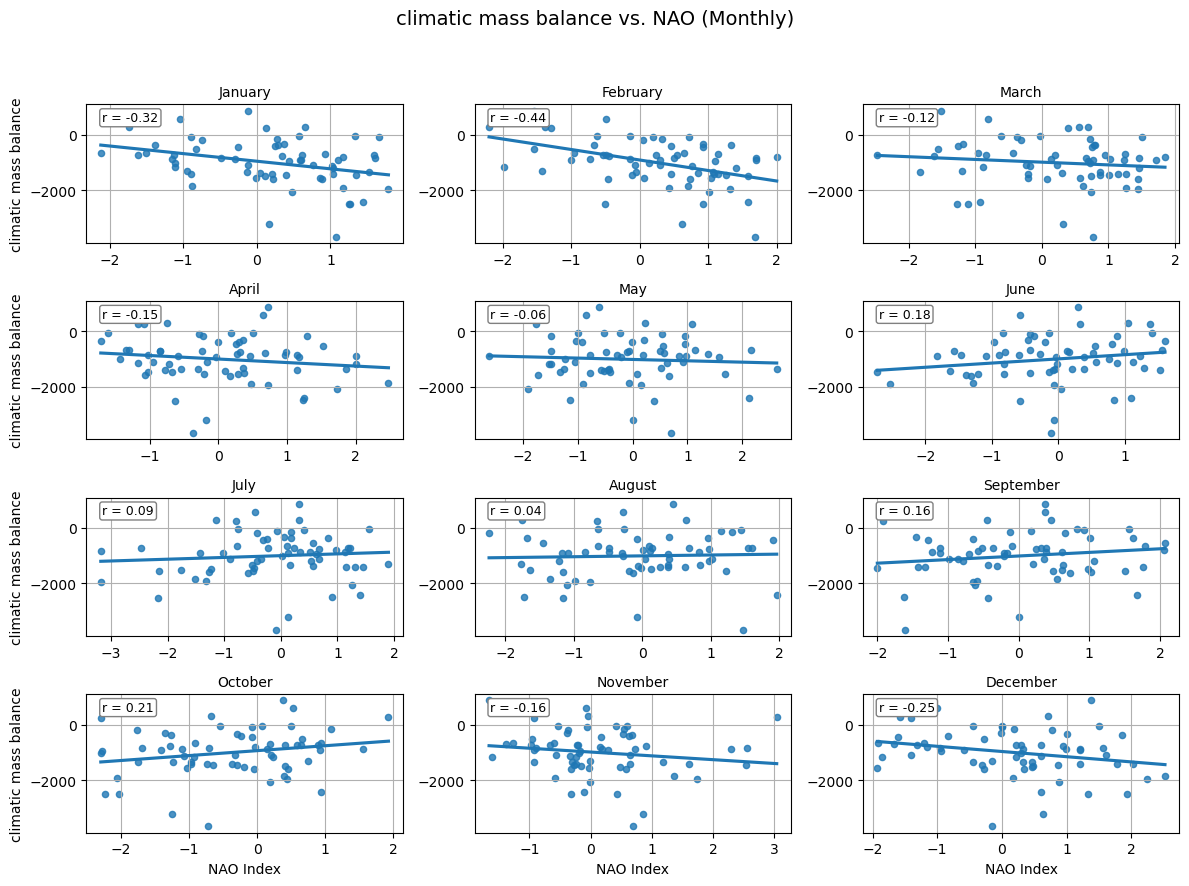

Correlation between winter mass balance and NAO (January): -0.071
Correlation between winter mass balance and NAO (February): -0.040
Correlation between winter mass balance and NAO (March): 0.146
Correlation between winter mass balance and NAO (April): -0.318
Correlation between winter mass balance and NAO (May): -0.047
Correlation between winter mass balance and NAO (June): -0.110
Correlation between winter mass balance and NAO (July): -0.078
Correlation between winter mass balance and NAO (August): 0.152
Correlation between winter mass balance and NAO (September): 0.307
Correlation between winter mass balance and NAO (October): 0.016
Correlation between winter mass balance and NAO (November): 0.098
Correlation between winter mass balance and NAO (December): -0.022


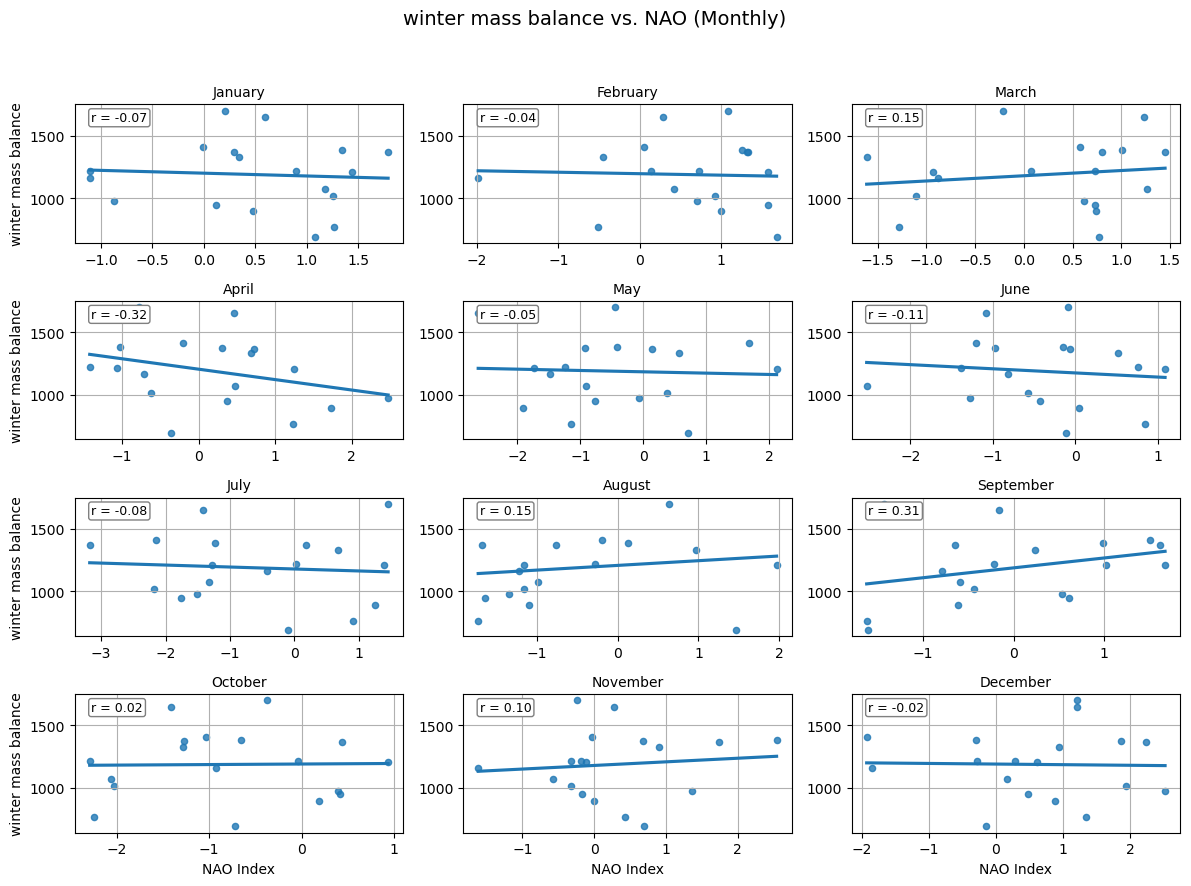

Correlation between winter mass balance B06 and NAO (January): -0.225
Correlation between winter mass balance B06 and NAO (February): -0.107
Correlation between winter mass balance B06 and NAO (March): -0.001
Correlation between winter mass balance B06 and NAO (April): 0.039
Correlation between winter mass balance B06 and NAO (May): 0.088
Correlation between winter mass balance B06 and NAO (June): -0.098
Correlation between winter mass balance B06 and NAO (July): 0.298
Correlation between winter mass balance B06 and NAO (August): -0.375
Correlation between winter mass balance B06 and NAO (September): 0.128
Correlation between winter mass balance B06 and NAO (October): -0.176
Correlation between winter mass balance B06 and NAO (November): 0.231
Correlation between winter mass balance B06 and NAO (December): 0.251


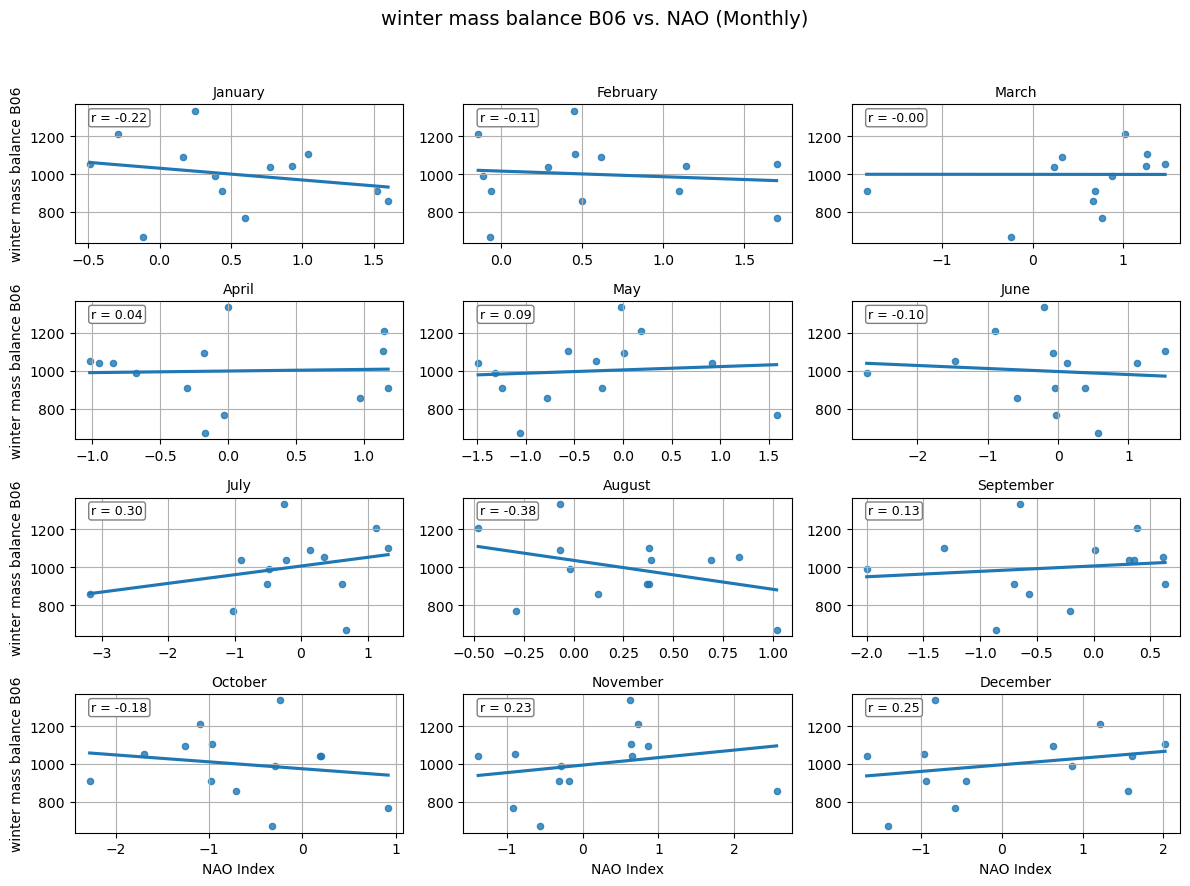

Correlation between winter mass balance K99 and NAO (January): -0.239
Correlation between winter mass balance K99 and NAO (February): -0.155
Correlation between winter mass balance K99 and NAO (March): -0.027
Correlation between winter mass balance K99 and NAO (April): 0.023
Correlation between winter mass balance K99 and NAO (May): -0.207
Correlation between winter mass balance K99 and NAO (June): -0.023
Correlation between winter mass balance K99 and NAO (July): 0.025
Correlation between winter mass balance K99 and NAO (August): -0.070
Correlation between winter mass balance K99 and NAO (September): 0.202
Correlation between winter mass balance K99 and NAO (October): -0.019
Correlation between winter mass balance K99 and NAO (November): 0.064
Correlation between winter mass balance K99 and NAO (December): -0.124


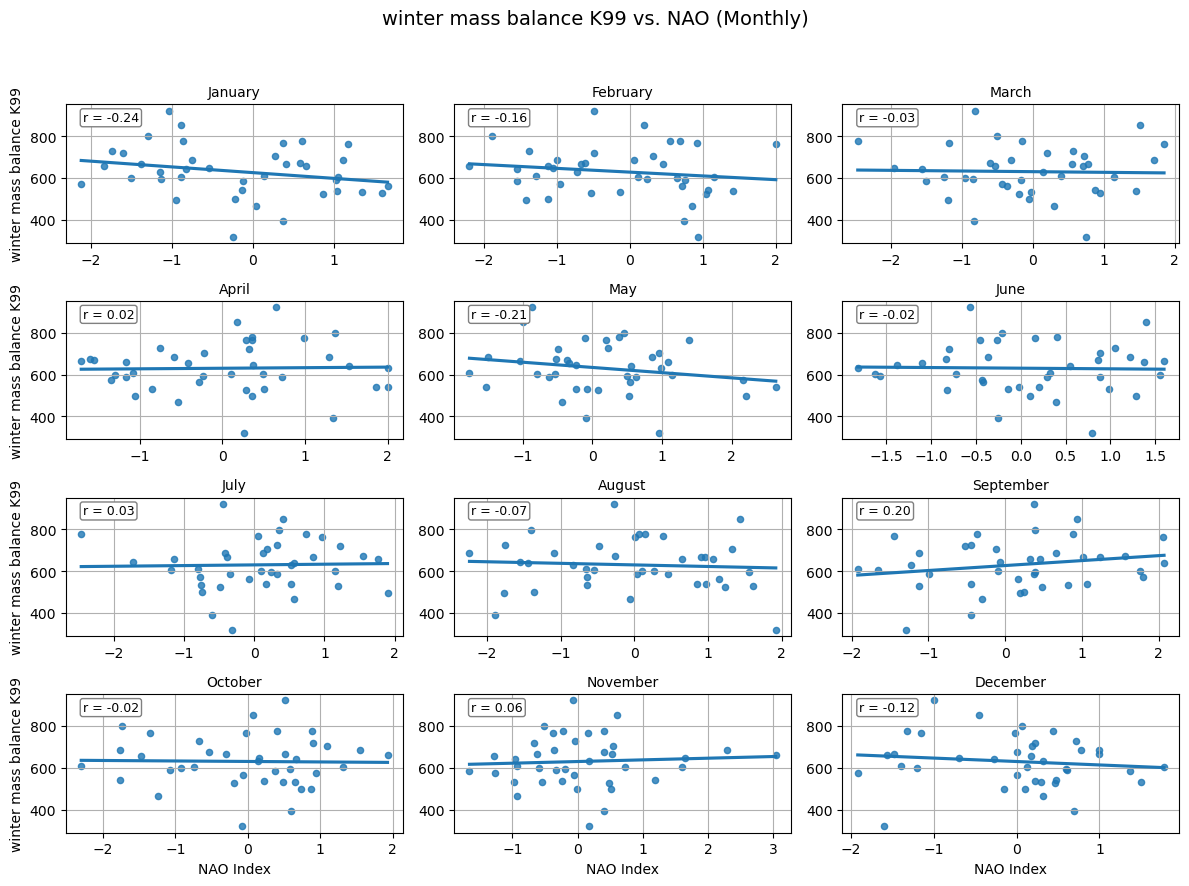

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load NAO index data from text file
nao_file = "/home/pcuser/hef/norm.nao.monthly.b5001.current.ascii.txt"
df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["hydrological_year", "month", "NAO_index"])

# Read in mass balance data
df_hef_MB = pd.read_pickle("hef_MB.pkl")

# Define mass balance variables to compare
mass_balance_vars = [
    "mean specific mass balance",
    "climatic mass balance",
    "winter mass balance",
    "winter mass balance B06",
    "winter mass balance K99"
]

# Plotting for each variable
for var in mass_balance_vars:
    fig, axes = plt.subplots(4, 3, figsize=(12, 9), sharex=False, sharey=False)
    fig.suptitle(f"{var} vs. NAO (Monthly)", fontsize=14)
    axes = axes.flatten()

    for month in range(1, 13):  # Months 1–12
        ax = axes[month - 1]

        # Filter NAO index for the given month
        df_nao_month = df_nao[df_nao["month"] == month].drop(columns=["month"])

        # Merge NAO data with mass balance data
        df_merged = pd.merge(df_hef_MB, df_nao_month, on="hydrological_year", how="inner")

        # Plot with seaborn
        sns.regplot(x="NAO_index", y=var, data=df_merged, ax=ax, ci=None, scatter_kws={'s': 20})

        # Month title
        month_name = pd.to_datetime(str(month), format="%m").strftime('%B')
        ax.set_title(month_name, fontsize=10)

        # Axis labels (only on left and bottom to reduce clutter)
        if month % 3 == 1:
            ax.set_ylabel(var)
        else:
            ax.set_ylabel("")
        if month > 9:
            ax.set_xlabel("NAO Index")
        else:
            ax.set_xlabel("")

        # Grid
        ax.grid(True)

        # Correlation text
        corr = df_merged["NAO_index"].corr(df_merged[var])
        ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
                ha='left', va='top', fontsize=9, bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="gray"))

        # Optional: print to console
        print(f"Correlation between {var} and NAO ({month_name}): {corr:.3f}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
    plt.show()

